In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
os.listdir('../data/nomad_data')

['marathon_2015_2017',
 'marathon_2015_2017.csv',
 'marathon_2015_2017_qualifying.csv',
 'marathon_qualifying_time.csv',
 'marathon_results_2015.csv',
 'marathon_results_2016.csv',
 'marathon_results_2017.csv',
 'marathon_total.csv']

In [2]:
df = pd.read_csv('../data/nomad_data/marathon_total.csv')

C:\Users\82105\AppData\Local\Continuum\anaconda3\envs\tf2.0-gpu\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


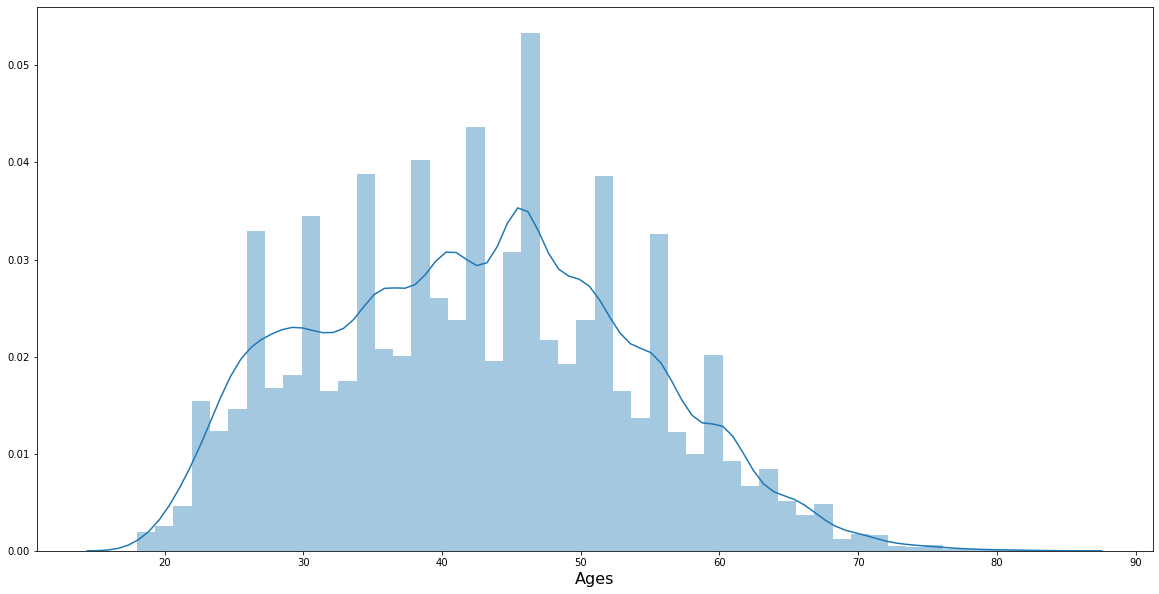

In [9]:
f = plt.figure(figsize=(20,10))
f.patch.set_facecolor('xkcd:white')
age_count = sns.distplot(df.Age)
age_count.set_xlabel('Ages', fontdict={'size' : 16})
plt.show()

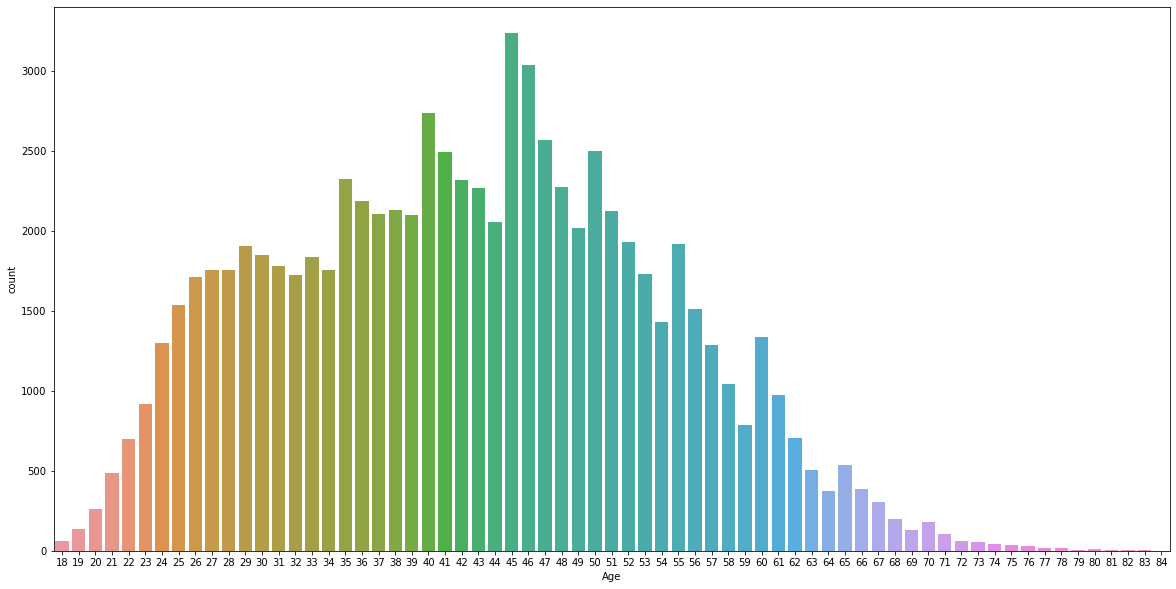

In [15]:
f = plt.figure(figsize=(20,10))
f.patch.set_facecolor('xkcd:white')
age_count = sns.countplot('Age',data=df)
plt.show()

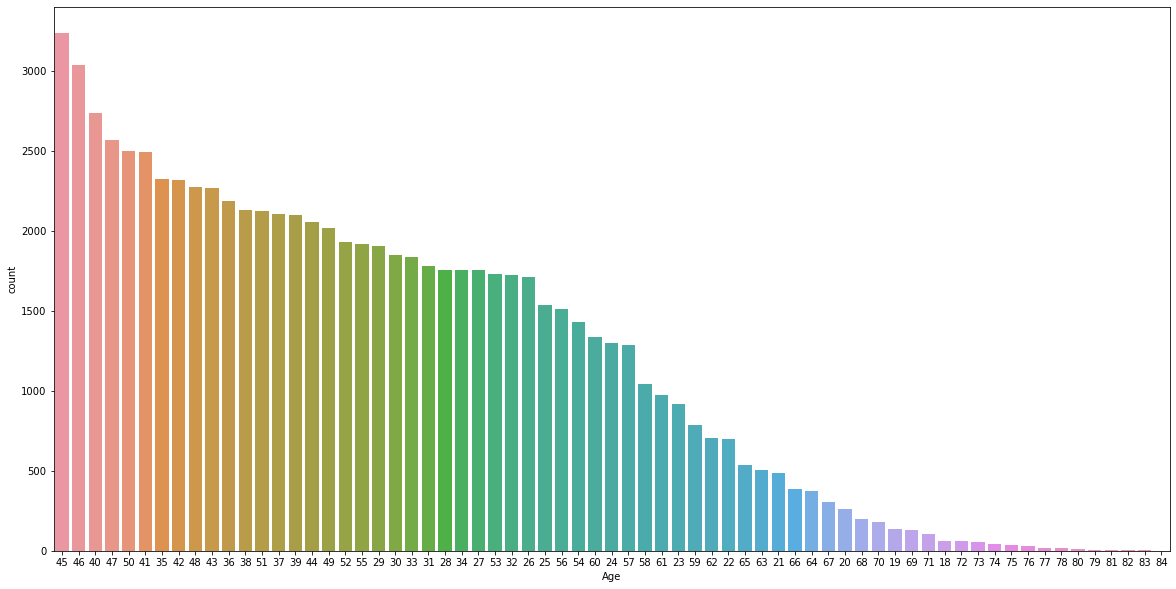

In [17]:
f = plt.figure(figsize=(20,10))
f.patch.set_facecolor('xkcd:white')
age_count = sns.countplot('Age',data=df,order=df['Age'].value_counts().index)
plt.show()

In [4]:
usa_runner = df[df['Country']=='USA']

In [5]:
usa_male = usa_runner[usa_runner['M/F']=='M']
usa_female = usa_runner[usa_runner['M/F']=='F']

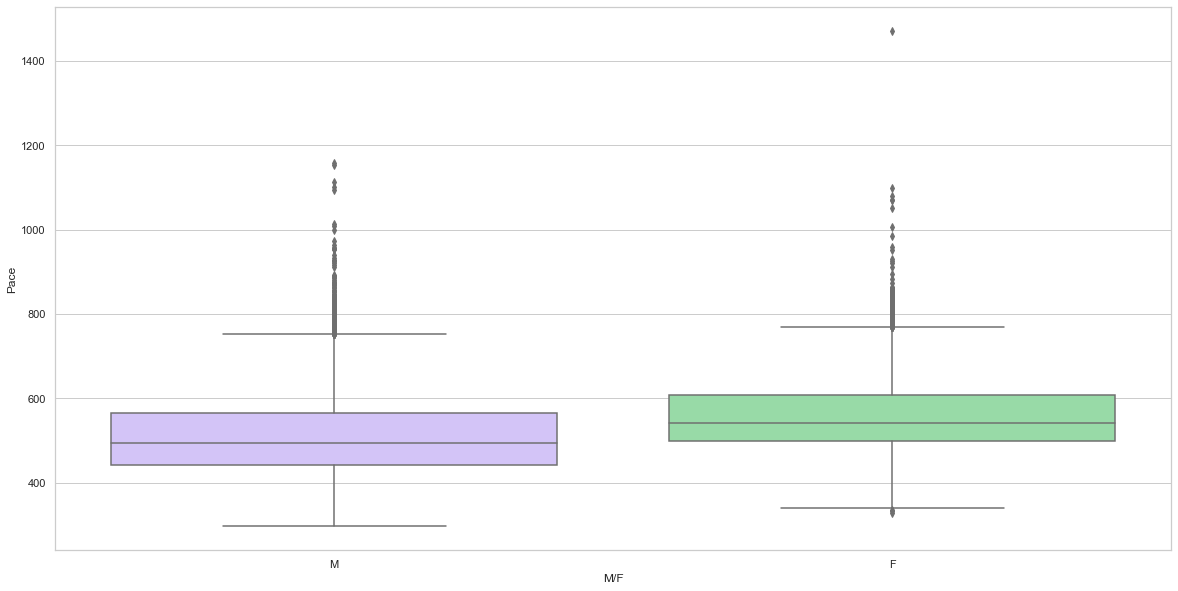

In [6]:
f = plt.figure(figsize=(20,10))
f.patch.set_facecolor('xkcd:white')
sns.set(style='whitegrid',palette='pastel')
sns.boxplot(x='M/F',y='Pace',
           palette=['m','g'],
           data=usa_runner)
plt.show()

In [26]:
usa_male_stat = usa_male['Pace'].describe()

In [27]:
usa_male_stat

count    33390.00000
mean       514.22944
std         97.99571
min        298.00000
25%        442.00000
50%        495.00000
75%        566.00000
max       1157.00000
Name: Pace, dtype: float64

In [28]:
usa_female_stat = usa_female['Pace'].describe()

In [29]:
usa_female_stat

count    31084.000000
mean       561.858448
std         88.425649
min        328.000000
25%        499.000000
50%        541.000000
75%        607.000000
max       1470.000000
Name: Pace, dtype: float64

In [30]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [2]:
import folium
folium.__version__

'0.11.0'

In [5]:
df = pd.read_csv('../data/nomad_data/marathon_total.csv')

C:\Users\82105\AppData\Local\Continuum\anaconda3\envs\tf2.0-gpu\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
df['5K'] = pd.to_timedelta(df['5K'])
df['10K'] = pd.to_timedelta(df['10K'])
df['15K'] = pd.to_timedelta(df['15K'])
df['20K'] = pd.to_timedelta(df['20K'])
df['25K'] = pd.to_timedelta(df['25K'])
df['30K'] = pd.to_timedelta(df['30K'])
df['35K'] = pd.to_timedelta(df['35K'])
df['40K'] = pd.to_timedelta(df['40K'])

In [18]:
df['5K']=df['5K'].astype('m8[s]').astype(np.int64)
df['10K']=df['10K'].astype('m8[s]').astype(np.int64)
df['15K']=df['15K'].astype('m8[s]').astype(np.int64)
df['20K']=df['20K'].astype('m8[s]').astype(np.int64)
df['25K']=df['25K'].astype('m8[s]').astype(np.int64)
df['30K']=df['30K'].astype('m8[s]').astype(np.int64)
df['35K']=df['35K'].astype('m8[s]').astype(np.int64)
df['40K']=df['40K'].astype('m8[s]').astype(np.int64)


In [20]:
df.head()

,Name,Age,M/F,City,State,Country,5K,10K,15K,20K,...,30K,35K,40K,Pace,Official Time,Overall,Gender,Division,Year,Unnamed: 8
0,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,0,0,0,0,...,0,0,0,296,7757,1,1,1,2015,NaN
1,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,0,0,0,0,...,0,0,0,298,7788,2,2,2,2015,NaN
2,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,0,0,0,0,...,0,0,0,299,7822,3,3,3,2015,NaN
3,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,0,0,0,0,...,0,0,0,300,7847,4,4,4,2015,NaN
4,"Korir, Wesley",32,M,Kitale,NaN,KEN,0,0,0,0,...,0,0,0,300,7849,5,5,5,2015,NaN


In [3]:
check_time = 7200
Lat = 0
Long = 0
Location = ''
points = [[42.247835,-71.474357],[42.274032,-71.423979],[42.282364,-71.364801],[42.29787,-71.28],
         [42.32483,-71.259660],[42.34568,-71.215169],[42.352089,-71.124947],[42.35151,-71.08]]

In [6]:
location = pd.DataFrame(columns=['Lat','Long'])
for index , record in df.iterrows():
    if record['40K']<check_time:
        Lat = points[7][0]
        Long = points[7][1]
    elif record['35K']<check_time:
        Lat = points[6][0]
        Long = points[6][1]
    elif record['30K']<check_time:
        Lat = points[5][0]
        Long = points[5][1]
    elif record['25K']<check_time:
        Lat = points[4][0]
        Long = points[4][1]
    elif record['20K']<check_time:
        Lat = points[3][0]
        Long = points[3][1]
    elif record['15K']<check_time:
        Lat = points[2][0]
        Long = points[2][1]
    elif record['10K']<check_time:
        Lat = points[1][0]
        Long = points[1][1]
    elif record['5K']<check_time:
        Lat = points[0][0]
        Long = points[0][1]
    location = location.append({'Lat':Lat,
                               'Long':Long},
                              ignore_index=True)

In [7]:
count

NameError: name 'count' is not defined

In [15]:
location.groupby(['Lat','Long']).size().reset_index(name='Count')

,Lat,Long,Count
0,42.274032,-71.423979,135
1,42.282364,-71.364801,12161
2,42.297870,-71.280000,40653
3,42.324830,-71.259660,23870
4,42.345680,-71.215169,2579
5,42.351510,-71.080000,76
6,42.352089,-71.124947,164


In [16]:
count = location.groupby(['Lat','Long']).size().reset_index(name='Count')

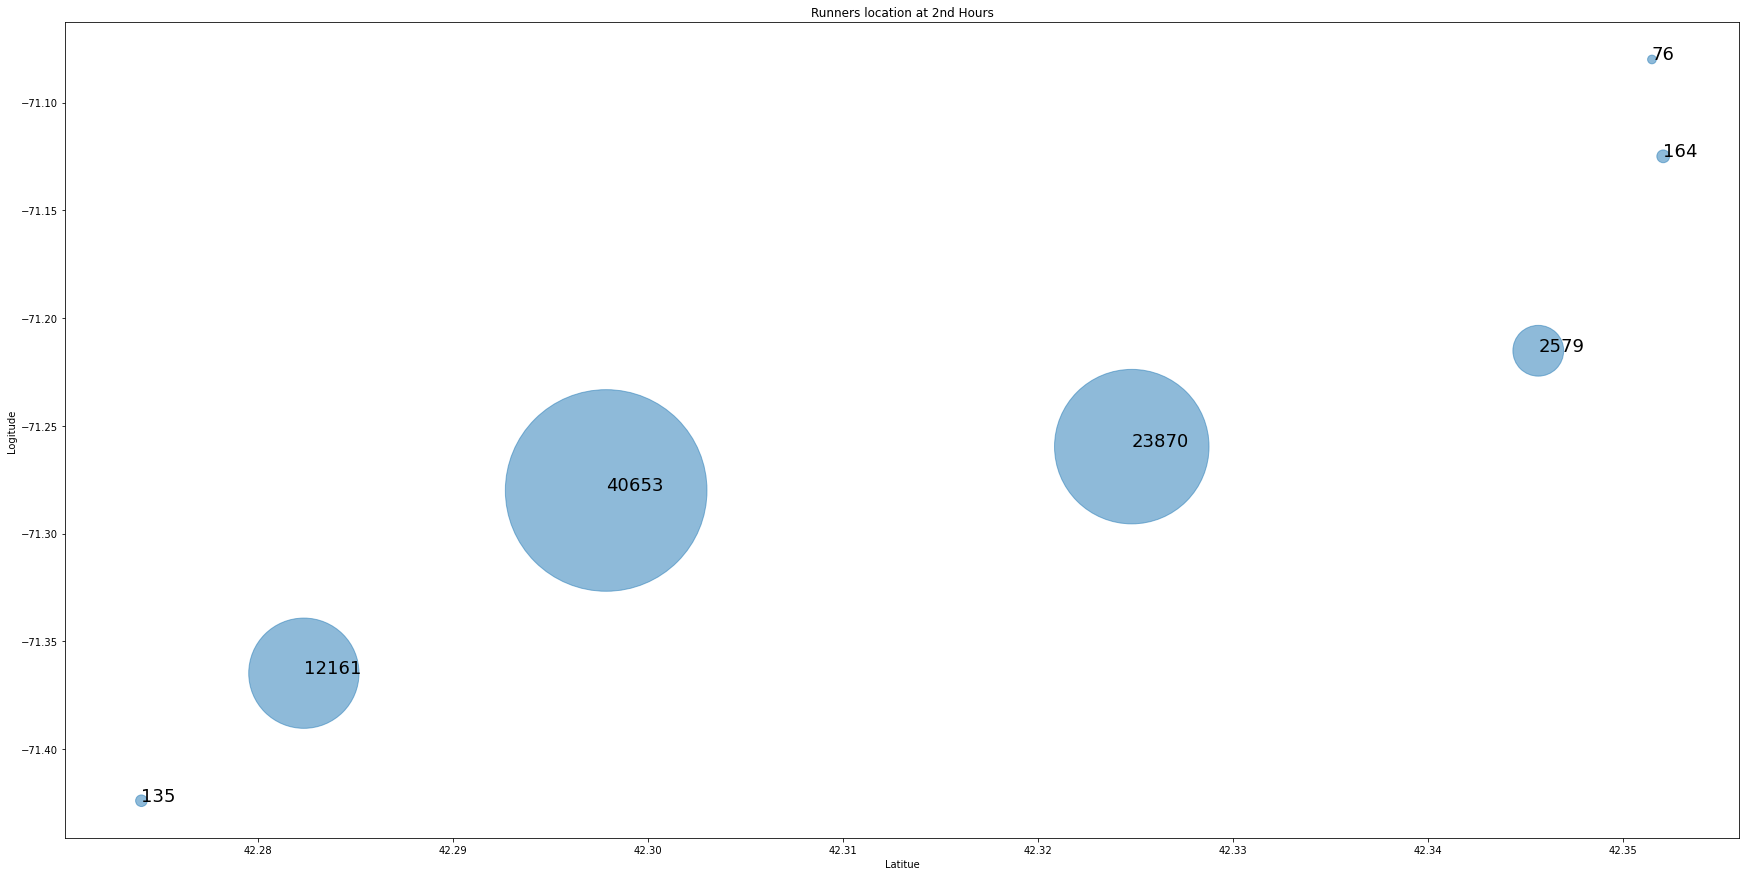

In [17]:
f=plt.figure(figsize=(30,15))
f.patch.set_facecolor('xkcd:white')
plt.scatter(count.Lat,count.Long,s=count.Count,alpha=0.5)
for i,txt in enumerate(count.Count):
    plt.annotate(txt,(count.Lat[i],count.Long[i]),fontsize=18)
    
plt.title('Runners location at 2nd Hours')
plt.xlabel('Latitue')
plt.ylabel('Logitude')
plt.show()

In [21]:
import folium
from folium.plugins import HeatMap
# tiles = ['Mapbox Bright','Stamen Toner','Mapbox Control Room','OpenStreetMap',
#'Mapbox Bright','Stamen Terrain']
map_ = folium.Map(location=[42.324830,-71.25966],
                 tiles = 'OpenStreetMap',
                 zoom_start = 11)
HeatMap(count,radius=20).add_to(map_)
map_